In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cm
from matplotlib import cm



In [2]:
##Determin the number of walkers and maximum number of steps
N=int(100)
M=int(16)


##############
#
#


#array for the steps taken, which follows a pattern of left, up, right, down
#with adjacent movements 1 and 3 slots away from each other
step=np.array(([1,0],[0,1],[-1,0],[0,-1]))


#create arrays for the number of steps, the radius squared(rs) and the total successes
Fn=np.linspace(0,M,M)
rs=np.zeros(M)
tot_success=[]

#iterate through each number of steps with N=1-M
for q in range(1,M+1):
    #array for the mean square and a count for the number of successful walkers per step total
    ms=[]
    success=0
    for j in range(N):

        #initial walker state, create the space and mark the center as visited
        visited=np.zeros(shape=[2*q+10,2*q+10]);visited[q,q]=1
        xt=0;yt=1
        x=[];y=[]
        #initial step is 1 in the positive y direction represented by step[1]
        x.append(0);x.append(0);y.append(0);y.append(1);
        forward=1
        #Take each step
        for i in range(q):
            #current position, centered in the workingspace, with a maximum of the number of steps
            pos=(q+xt,q+yt)
            #check steps available and add to an empty array(not checking in simple walk method)
            available=[]
            left=(forward+1)%4;right=(forward+3)%4
#             if visited[pos[0]+step[left][0],pos[1]+step[left][1]]==0:
            available.append(left)
#             if visited[pos[0]+step[forward][0],pos[1]+step[forward][1]]==0:
            available.append(forward)
#             if visited[pos[0]+step[right][0],pos[1]+step[right][1]]==0:
            available.append(right)
            #take step
            if len(available)>0 and visited[pos]!=1:
                #mark current location as visited
                visited[pos]=1
                #set forward to a random step
                forward=available[np.random.randint(0,len(available))]
                #Make step and append to x and y list
                l,r=step[forward]
                xt+=l;yt+=r
                x.append(xt);y.append(yt)
            else:
                #if the step has been visited break the loop and start another walker
                break

            if i==q-1:
                #if this is the last step taken then append to the mean square array
                ms.append(xt**2+yt**2)
                success+=1
    #after all walkers of a given step size have completed the total successful numbers are appended to the list
    #T
    tot_success.append(success)
    #for each value N(q) then set it equal to the average of the ms array, which will be reinitialized next q
    rs[q-1]=np.average(ms)


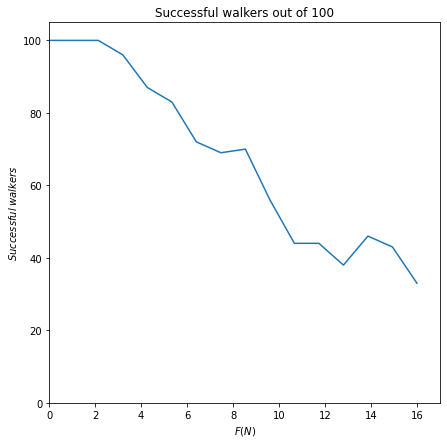

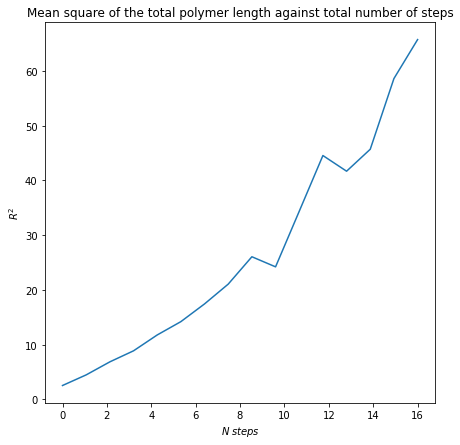

In [3]:
#plot results
fig, ax = plt.subplots(figsize=(7,7),)
ax.plot(Fn,tot_success)
plt.xlabel("$F(N)$".format())
plt.ylabel("$Successful\; walkers$")
plt.title("Successful walkers out of {0}".format(N))
plt.xlim([0, M+1])
plt.ylim([0, N+5])
plt.savefig('Success rate non SAW.jpg')

fig, ax = plt.subplots(figsize=(7,7))
ax.plot(Fn,rs)
plt.xlabel("$N\;steps$".format())
plt.ylabel("$R^2$")
plt.title("Mean square of the total polymer length against total number of steps")
plt.savefig('Mean square non SAW.jpg')

With no self avoiding techniques the 

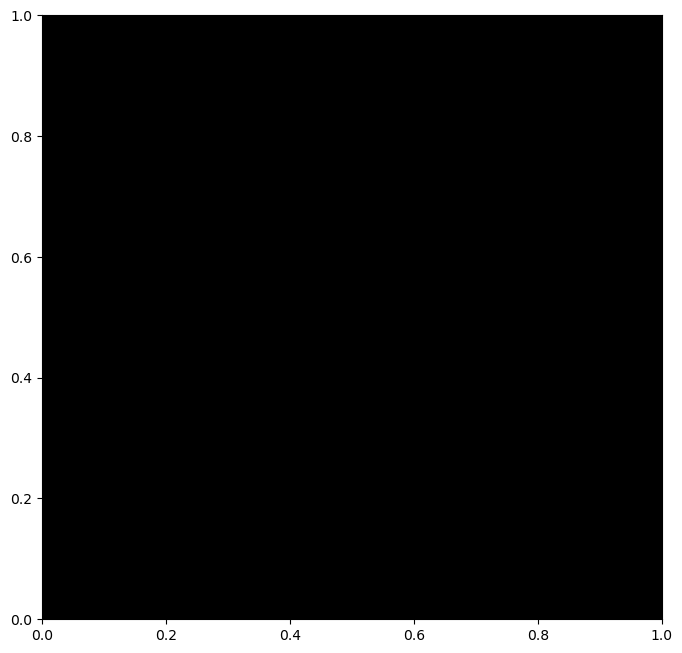

In [158]:
##Determin the number of walkers and maximum number of steps
N=int(100)
M=int(32)


##############
#
#


#array for the steps taken, which follows a pattern of left, up, right, down
#with adjacent movements 1 and 3 slots away from each other
step=np.array(([1,0],[0,1],[-1,0],[0,-1]))


#initialize the main arrays
Fn=np.linspace(0,M+1,M)
rs=np.zeros(M)
tot_success=[]

#create a t value for graphing successful walks and an initial figure which will serve as the frame for the video
#since the average value for the number of steps taken was less than 20 I found xy limit size of 25 in any direction
#to be a good amount to see everything
jpg=0


# plt.title("Self avoiding random Walk")
# plt.xlim([-20, 20])
# plt.ylim([-20,20])
fig, ax= plt.subplots(figsize=(8,8),dpi=100)
avgweight=np.zeros(M)

for q in range(1,M+1):
    

    plt.title("Self avoiding random Walk")
    plt.xlim([-20, 20])
    plt.ylim([-20,20])

    success=0
    ms=[]
    #create a variable to hold the total cumulative weights
    wt=[]
    for j in range(N):
        
        #initial walker state
        visited=np.zeros(shape=[2*q+10,2*q+10]);visited[q,q]=1
        xt=0;yt=1
        x=[];y=[]
        #initial step is 1 in the positive y direction represented by step[1]
        x.append(0);x.append(0);y.append(0);y.append(1);
        forward=1
        w=1
        #Take each step
        
        for i in range(q+1):
            #current position, centered in the workingspace, with a maximum of the number of steps
            pos=(q+xt,q+yt)
            #check steps available by filling an array of numbers between 0 and 3 which correspond to the direction of the
            #left right and forward compared to the last step.
            available=[]
            left=(forward+1)%4;right=(forward+3)%4
            if visited[pos[0]+step[left][0],pos[1]+step[left][1]]==0:
                available.append(left)
            if visited[pos[0]+step[forward][0],pos[1]+step[forward][1]]==0:
                available.append(forward)
            if visited[pos[0]+step[right][0],pos[1]+step[right][1]]==0:
                available.append(right)
                
            #created a weight value to increment which is 1 for 3 available steps 2/3 for 2, 1/3 for 1, and 0 for no steps.
            w=w*len(available)/3
            #take step as long as there are available steps
            if w!=0:
                visited[pos]=1
                forward=available[np.random.randint(0,len(available))]
                l,r=step[forward]
                xt+=l;yt+=r
                x.append(xt);y.append(yt)
            else:
                #otherwise end and start the next walker
                break

            if i==q:
                #append the square distance multiplied by the weight
                ms.append(w*(xt**2+yt**2))
                wt.append(w)
                success+=1
                #Generate the plot and save a jpg every 10 plots
                ax.set_facecolor("black")
                #cycle through the cool colormap with an alpha relative to the weight of the polymer
                ax.plot(x,y,color=cm.cool(np.cos((w)*(np.pi/2))*255),alpha=w)
                
                if success%10==0 and not i==M-1:
                    jpg+=1
                    plt.savefig('movies\movie\{0:.0f}.jpg'.format(jpg))
                elif i==M-1:
                    jpg+=1
                    plt.savefig('movies\movie\{0:.0f}.jpg'.format(jpg))
                
        
    plt.cla()
    rs[q-1]= np.sum(ms)/np.sum(wt)

    tot_success.append(success)

In [159]:
print(jpg)

351


In [165]:
import imageio
#using imageio to create a gif
#Stacking an array with the images created by the previous loop

images = []

for i in range(jpg):
    images.append(imageio.imread("movies\movie\{0}.jpg".format(i+1)))
    
imageio.mimsave('movies\SAW.gif',images,fps=10)
#I then converted the gif to an mp4 format to upload onto the powerpoint

In [161]:
# fitting N^2 to a curve of R^2 to calculate nu
x= Fn[1:]**2
y_data=rs[1:]
y_log=np.log(rs[1:])
m,b= np.polyfit(x,y_log, 1,w=np.sqrt(y_log))  
print(m,b,np.exp(m))

0.00198300950540708 3.2708995007608266 1.0019849769690412


In [162]:
#best fit curve
y = np.exp(b)*np.exp(m*x)#*x)*np.exp(c)


[16, 16]


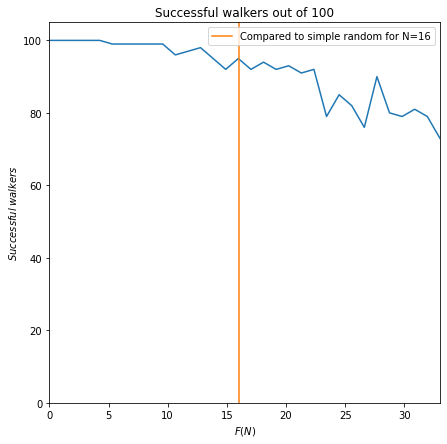

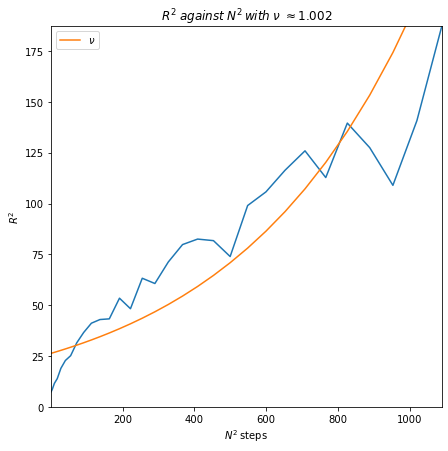

In [164]:
# Creating plots for the results from the self avoiding random walk
xf=[16,16]
yf=[0,max(tot_success)+5]
print(xf)
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(Fn,tot_success)
plt.xlabel("$F(N)$".format())
plt.ylabel("$Successful\; walkers$")
plt.title("Successful walkers out of {0}".format(N))
plt.xlim([0, M+1])
plt.ylim([0, N+5])
plt.plot(xf,yf,label="Compared to simple random for N=16")
plt.legend()
plt.savefig('Success rate of SAW.jpg')

fig, ax = plt.subplots(figsize=(7,7))
plt.xlim([min(x), max(x)])
plt.ylim([0, max(y_data)])
ax.plot(x,y_data)
plt.xlabel(r"$N^2\;$steps")
plt.ylabel("$R^2$")
plt.title(r"$R^2 \;against\; N^2\,with\;\nu\;\approx{0:0.4}$".format(np.exp(m)))
plt.plot(x,y,label=r"$\nu$")
plt.legend()
plt.savefig('Log Steps.jpg')
